In [38]:
import importlib

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

from Utils import paths
from Utils import transformation_utils as t_utils

importlib.reload(paths)
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [6]:
fhr = pd.read_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/fhr.pickle")
uc = pd.read_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/uc.pickle")
y = pd.read_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/y.pickle")

fhr.shape, uc.shape, y.shape

((538, 9600), (538, 9600), (538,))

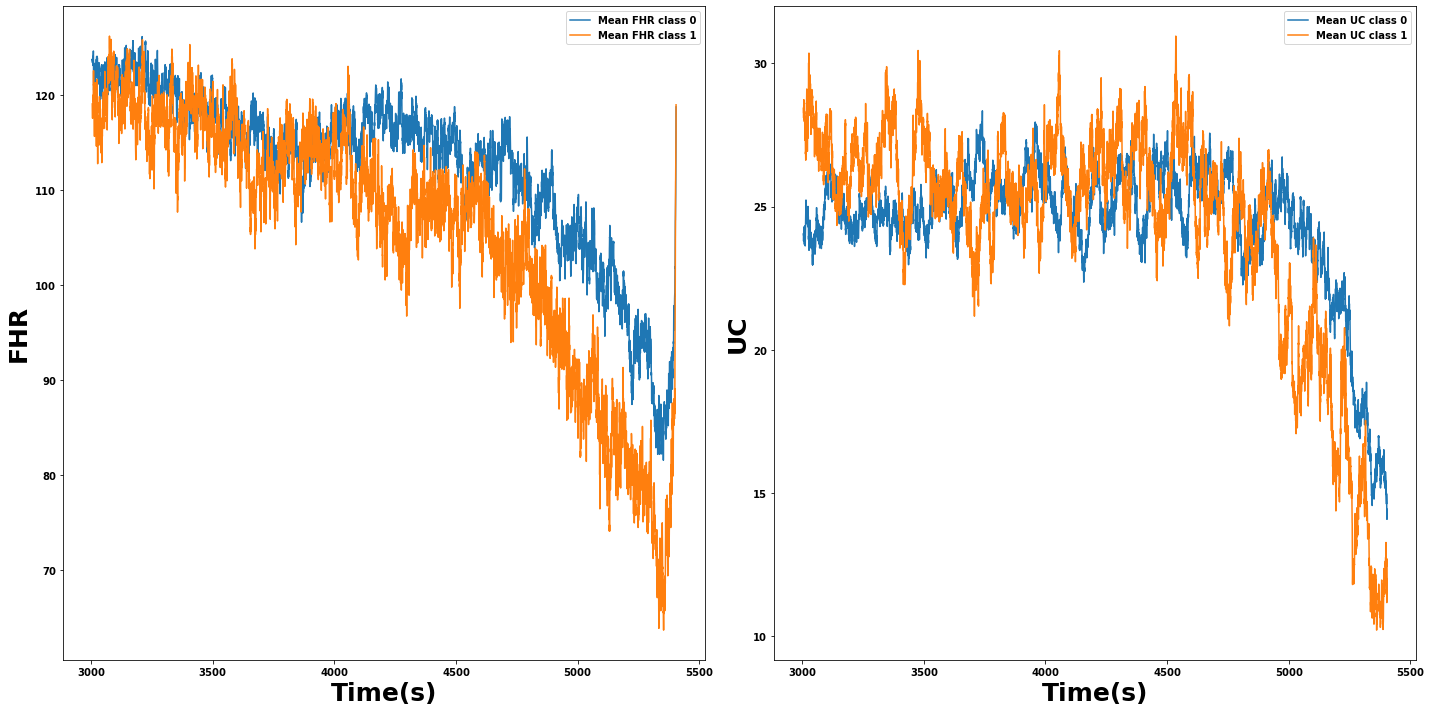

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].plot(fhr[y == 0].mean().index, fhr[y == 0].mean().values, label='Mean FHR class 0')
ax[0].plot(fhr[y == 1].mean().index, fhr[y == 1].mean().values, label='Mean FHR class 1')
ax[1].plot(uc[y == 0].mean().index, uc[y == 0].mean().values, label='Mean UC class 0')
ax[1].plot(uc[y == 1].mean().index, uc[y == 1].mean().values, label='Mean UC class 1')

ax[0].set_xlabel('Time(s)', fontsize=25)
ax[1].set_xlabel('Time(s)', fontsize=25)
ax[0].set_ylabel('FHR', fontsize=25)
ax[1].set_ylabel('UC', fontsize=25)
ax[0].legend()
ax[1].legend()
fig.tight_layout()

In [12]:
cc_data = dict()
lags = t_utils.calc_lags(minutes=5)

for (idx_fhr, fhr_row), (idx_uc, uc_row) in tqdm(zip(fhr.copy().iterrows(), uc.copy().iterrows()), total=len(uc)):
    fhr_signal = pd.Series(fhr_row.values)
    uc_signal = pd.Series(uc_row.values)

    cc_data[idx_fhr] = joblib.Parallel(n_jobs=8)(
        joblib.delayed(t_utils.cc)(fhr_signal, uc_signal, lag) for lag in lags
    )
# 538/538 [02:24<00:00, 3.74it/s]

  0%|          | 0/538 [00:00<?, ?it/s]

In [14]:
cc_df = pd.DataFrame(cc_data).T
cc_df.columns = lags
cc_df

,-1199,-1198,-1197,-1196,-1195,-1194,-1193,-1192,-1191,-1190,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
1001,0.201660,0.204104,0.206325,0.207301,0.208599,0.209741,0.211324,0.212633,0.214103,0.216562,...,0.225491,0.227704,0.230142,0.231991,0.233544,0.234792,0.235750,0.236794,0.237782,0.239301
1002,0.167147,0.167528,0.168415,0.169827,0.170939,0.172350,0.173844,0.175960,0.177443,0.178776,...,-0.088344,-0.086680,-0.085650,-0.085273,-0.084798,-0.084121,-0.083751,-0.083548,-0.083669,-0.084344
1003,-0.035144,-0.037631,-0.039965,-0.042419,-0.044924,-0.047608,-0.050421,-0.051550,-0.052588,-0.053734,...,0.012638,0.013019,0.013201,0.013619,0.013861,0.014120,0.014277,0.014595,0.014888,0.015329
1004,-0.194449,-0.192608,-0.191166,-0.190078,-0.188907,-0.186781,-0.186899,-0.187835,-0.188117,-0.187997,...,-0.034680,-0.037664,-0.040728,-0.044003,-0.046991,-0.050035,-0.052526,-0.054836,-0.057302,-0.059520
1005,0.171125,0.171402,0.171515,0.171501,0.171474,0.171305,0.171074,0.170598,0.170419,0.170103,...,0.141663,0.141635,0.140860,0.140208,0.139543,0.138721,0.138068,0.137749,0.137156,0.136808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,-0.018057,-0.017097,-0.016799,-0.016475,-0.016149,-0.015594,-0.014853,-0.014013,-0.013197,-0.012364,...,-0.049774,-0.051816,-0.053419,-0.054544,-0.055441,-0.055627,-0.055798,-0.056077,-0.056374,-0.055904
2043,0.125303,0.125106,0.123687,0.121832,0.120088,0.119604,0.119152,0.119404,0.119443,0.120064,...,-0.083112,-0.080627,-0.079836,-0.080673,-0.080102,-0.080679,-0.081306,-0.082692,-0.084417,-0.085979
2044,-0.098642,-0.098925,-0.096631,-0.095041,-0.096703,-0.098252,-0.102324,-0.106495,-0.107036,-0.107344,...,-0.142116,-0.140500,-0.138671,-0.132827,-0.127761,-0.126440,-0.125411,-0.124908,-0.124721,-0.127677
2045,-0.032636,-0.036342,-0.040865,-0.045309,-0.049155,-0.053345,-0.056887,-0.060285,-0.064086,-0.067114,...,0.138058,0.137526,0.137397,0.137007,0.136583,0.136114,0.135175,0.134704,0.134120,0.133392


Text(0.5, 0, 'Lag (s)')

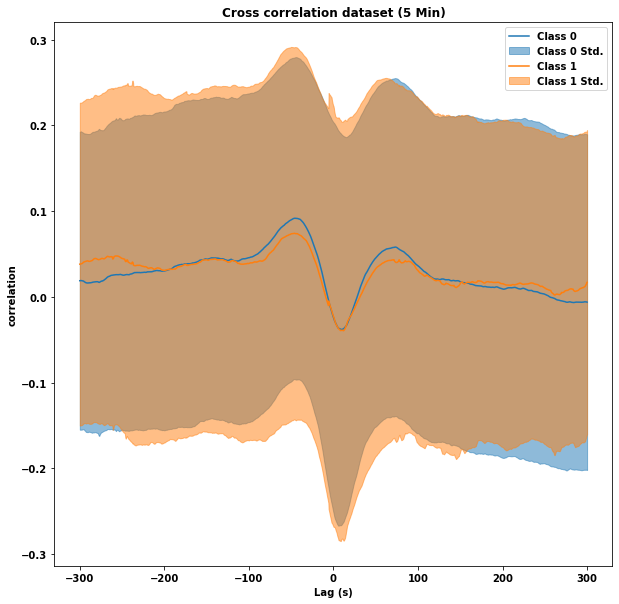

In [28]:
tt = np.array(lags)

cc_0 = cc_df.copy()[y == 0]
mean_0 = cc_0.mean().values
std_0 = cc_0.std().values
max_0 = cc_0.max().values
min_0 = cc_0.min().values

cc_1 = cc_df.copy()[y == 1]
mean_1 = cc_1.mean().values
std_1 = cc_1.std().values
max_1 = cc_1.max().values
min_1 = cc_1.min().values

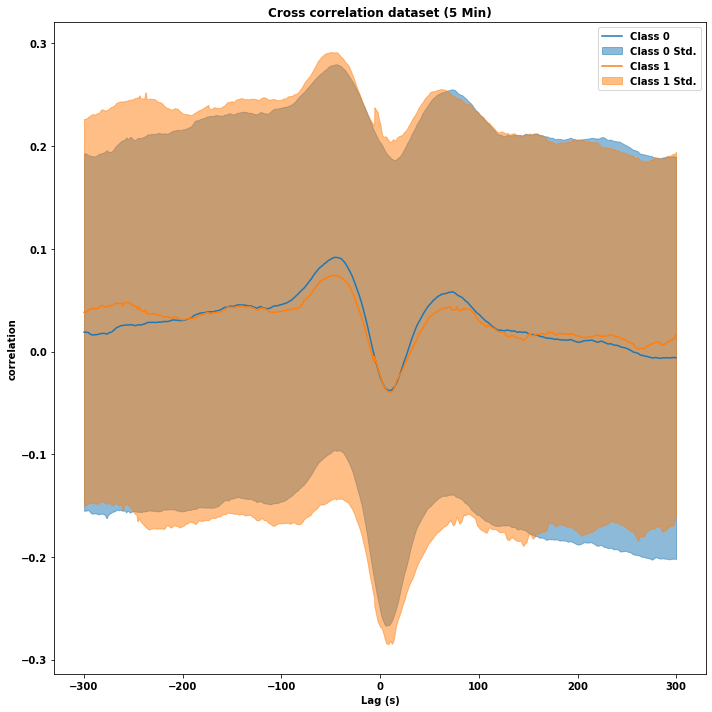

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])

ax.plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])

ax.legend(loc='best')
ax.set_title(f"Cross correlation dataset (5 Min)")
ax.set_ylabel(f"correlation")
ax.set_xlabel("Lag (s)")
fig.tight_layout()

plt.savefig(f"{paths.CC_DATA_PLOTS}/Desc_plot.png")
plt.savefig(f"{paths.CC_DATA_PLOTS}/Desc_plot.pdf")

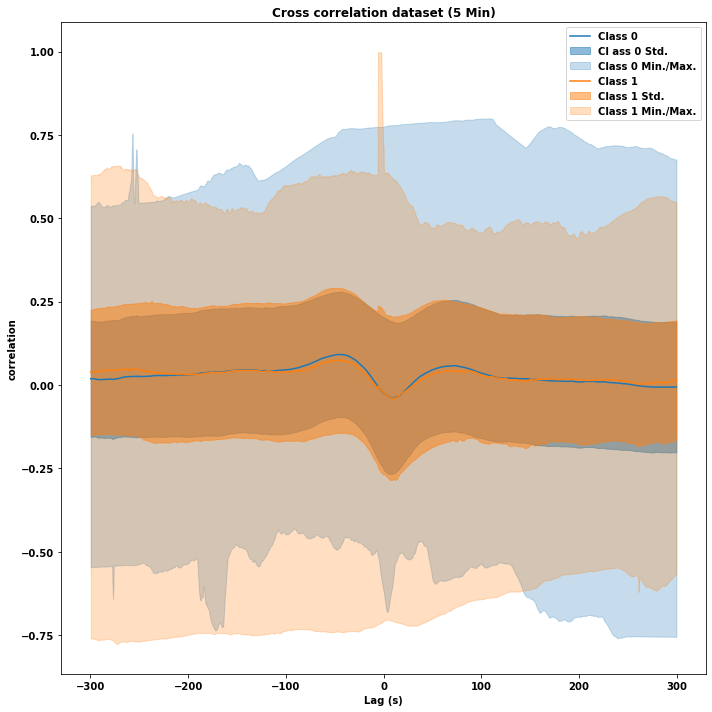

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Cl ass 0 Std.', alpha=0.5, color=COLORS[0])
ax.fill_between(tt / 4, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax.plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax.fill_between(tt / 4, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax.legend(loc='best')
ax.set_title(f"Cross correlation dataset (5 Min)")
ax.set_ylabel(f"correlation")
ax.set_xlabel("Lag (s)")
fig.tight_layout()

plt.savefig(f"{paths.CC_DATA_PLOTS}/Desc_plot_Mm.png")
plt.savefig(f"{paths.CC_DATA_PLOTS}/Desc_plot_Mm.pdf")

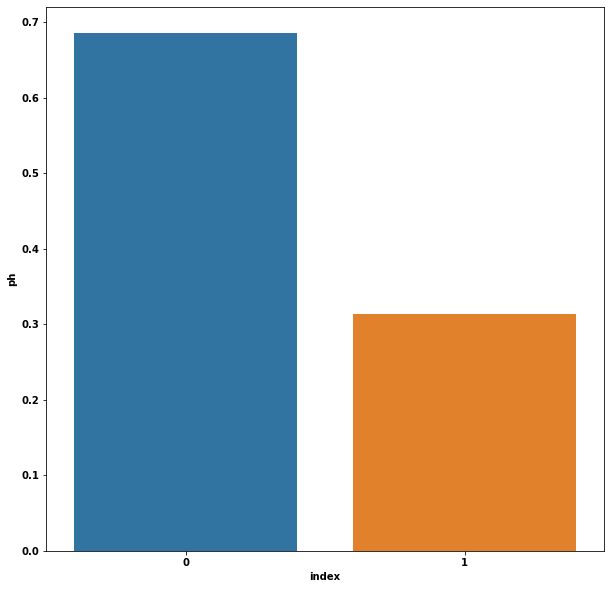

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x='index', y='ph', data=pd.DataFrame(y.value_counts(normalize=True)).reset_index())
plt.savefig(f"{paths.CC_DATA_PLOTS}/Class_Distribution.png")
plt.savefig(f"{paths.CC_DATA_PLOTS}/Class_Distribution.pdf")